# Домашнее задание 4: kNN. Линейные модели. Работа с признаками

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


## Задание 1:  Визуализация решающих поверхностей в kNN.

### Задача 1.1 (0.5 балла)
Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
X.isna().sum().sum()

0

Пропусков в датасете нет (выражение выше равняется нулю).

In [ ]:
cols = X.columns
num_cols = X._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

В датасете нет категориальных признаков!

### Задача 1.2 (0.5 балла)
Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, np.array(counts) / np.sum(counts)))

{0: 0.33064516129032256, 1: 0.4032258064516129, 2: 0.2661290322580645}

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, np.array(counts) / np.sum(counts)))

{0: 0.3333333333333333, 1: 0.3888888888888889, 2: 0.2777777777777778}

Аргумент `stratify` нужен, чтобы сохранить баланс классов в обучающей и тестовой выборке. Сохраняя баланс классов при обучении, модель не будет делать ложных "предубеждений", что какой-то класс доминирует над другими, да и в целом, если баланса классов не будет, то модель не сможет нормально обучиться.

В кусках кода сверху выведены распределения целевой переменной в обучающей и тестовой выборках. Можно заметить, что баланс классов не идеален, но я уверен, что достопочтенный `stratify` сделал всё, что он мог. В данном случае позволю себе оценить, что погрешность в распределении классов незначительна.

### Задача 1.3 (1 балл)
На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_transformed = scaler.transform(X_test[['alcohol', 'magnesium']])

In [ ]:
def predict(classifier, x, y):
    y_predicted = classifier.predict(x)
    return np.mean(y_predicted == y)

In [ ]:
df = pd.DataFrame({
    "NN": [1, 3, 5, 10, 15, 25]
})

df['Classifier'] = df.apply(lambda row: KNeighborsClassifier(n_neighbors=row['NN'], metric='euclidean').fit(X_train_transformed, y_train), axis = 1)
df['Train'] = df.apply(lambda row: predict(row['Classifier'], X_train_transformed, y_train), axis = 1).round(2)
df['Test'] = df.apply(lambda row: predict(row['Classifier'], X_test_transformed, y_test), axis = 1).round(2)
columns = ['NN', 'Train', 'Test']

In [ ]:
df[columns]

,NN,Train,Test
0,1,1.00,0.56
1,3,0.80,0.63
2,5,0.78,0.63
3,10,0.75,0.65
4,15,0.72,0.63
5,25,0.69,0.69


### Задача 1.4 (0 баллов)
Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend

### Задача 1.5 (1 балл)
Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

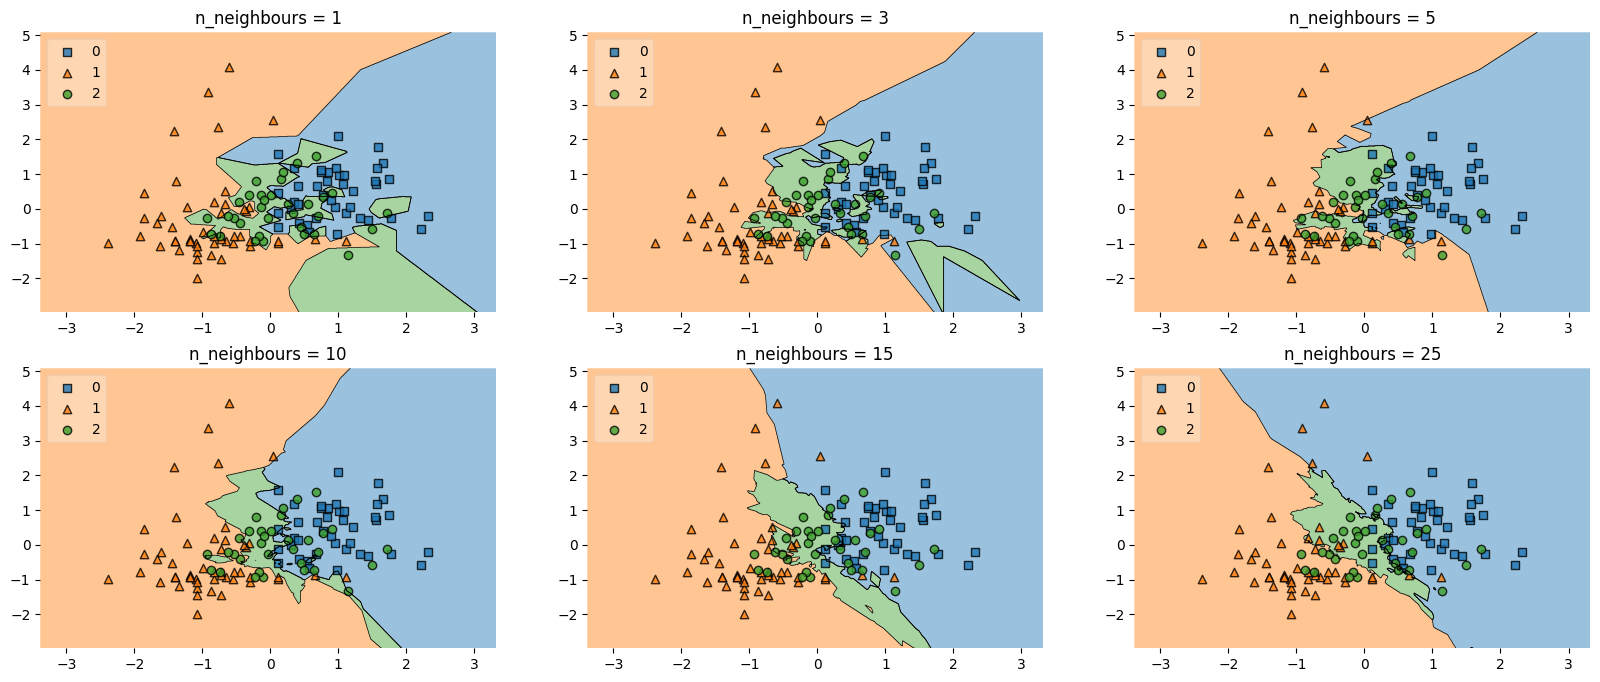

In [ ]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20,8))
labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']

for clf, lab, grd in zip(df['Classifier'],
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_transformed, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

### Задача 1.6 (0.5 балла)
Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

По заданию 1.3 видно, что лучший k для модели = 25, следующее значение - 10. В целом, значения k равные 5, 10, 15, 25 все находятся +- на одном уровне. Сильно выделяются значения 1 и 3, т.к. они имеют высокое значение на обучающей выборке и низкое на тестовой. Модель плохо "реагирует" новые данные, а следовательно, она переобучилась. Это видно и на графиках (задание 1.5). При k = 1, 3 модель плохо "обобщает" и не замечает "закономерностей", площади очень рваные, резкие и непредсказуемые, появляются какие-то рандомные зеленые области в рандомных местах.

Если рассматривать графики при k = 15, 25, то можно сказать, что модель, как будто бы, обобщает слишком сильно. Зеленый класс слишком "задоминирован" двумя другими, а также верхние оранжевые элементы были размечены как синие. Не имея информации из задания 1.3, я бы сказал, что график для k = 5 - лучший. Для меня он выглядит лучше всего.



## Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

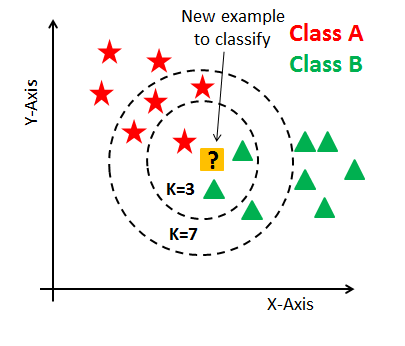

In [ ]:
from collections import Counter

In [ ]:
class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        return np.apply_along_axis(self.predict_class, 1, X) # векторизовал операцию поиска k ближайших соседей
                                                             # для каждого элемента в поступающей на вход выборке

    def count_distance(self, x, y):
        return np.sum((x - y) ** 2) ** 0.5

    def predict_class(self, x):
        dists = np.apply_along_axis(self.count_distance, 1, self.X, x)  # векторизовал операцию поиска расстояния от всех соседей до текущего элемента
        min_indices = np.argpartition(dists, self.k)[:self.k] # argpartition сортирует массив dists и возвращает k индексов, на
                                                              # которых стояли k минимальных элементов до сортировки
        return Counter(self.y[min_indices]).most_common(1)[0][0] # получаю классы по индексам, рассчитанным ранее (классы ближайших k соседей) и возвращаю моду данного набора значений

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

## Получение датасета для задания 3 с Kaggle

### ЕСЛИ У ВАС НЕТ ФАЙЛА **kaggle.json**


>Чтобы импортировать нужный датасет, нажмите [сюда](https://www.kaggle.com/settings) и авторизуйтесь. Затем нажмите кнопку **Create New Token**, которая скачает файл `kaggle.json`.
 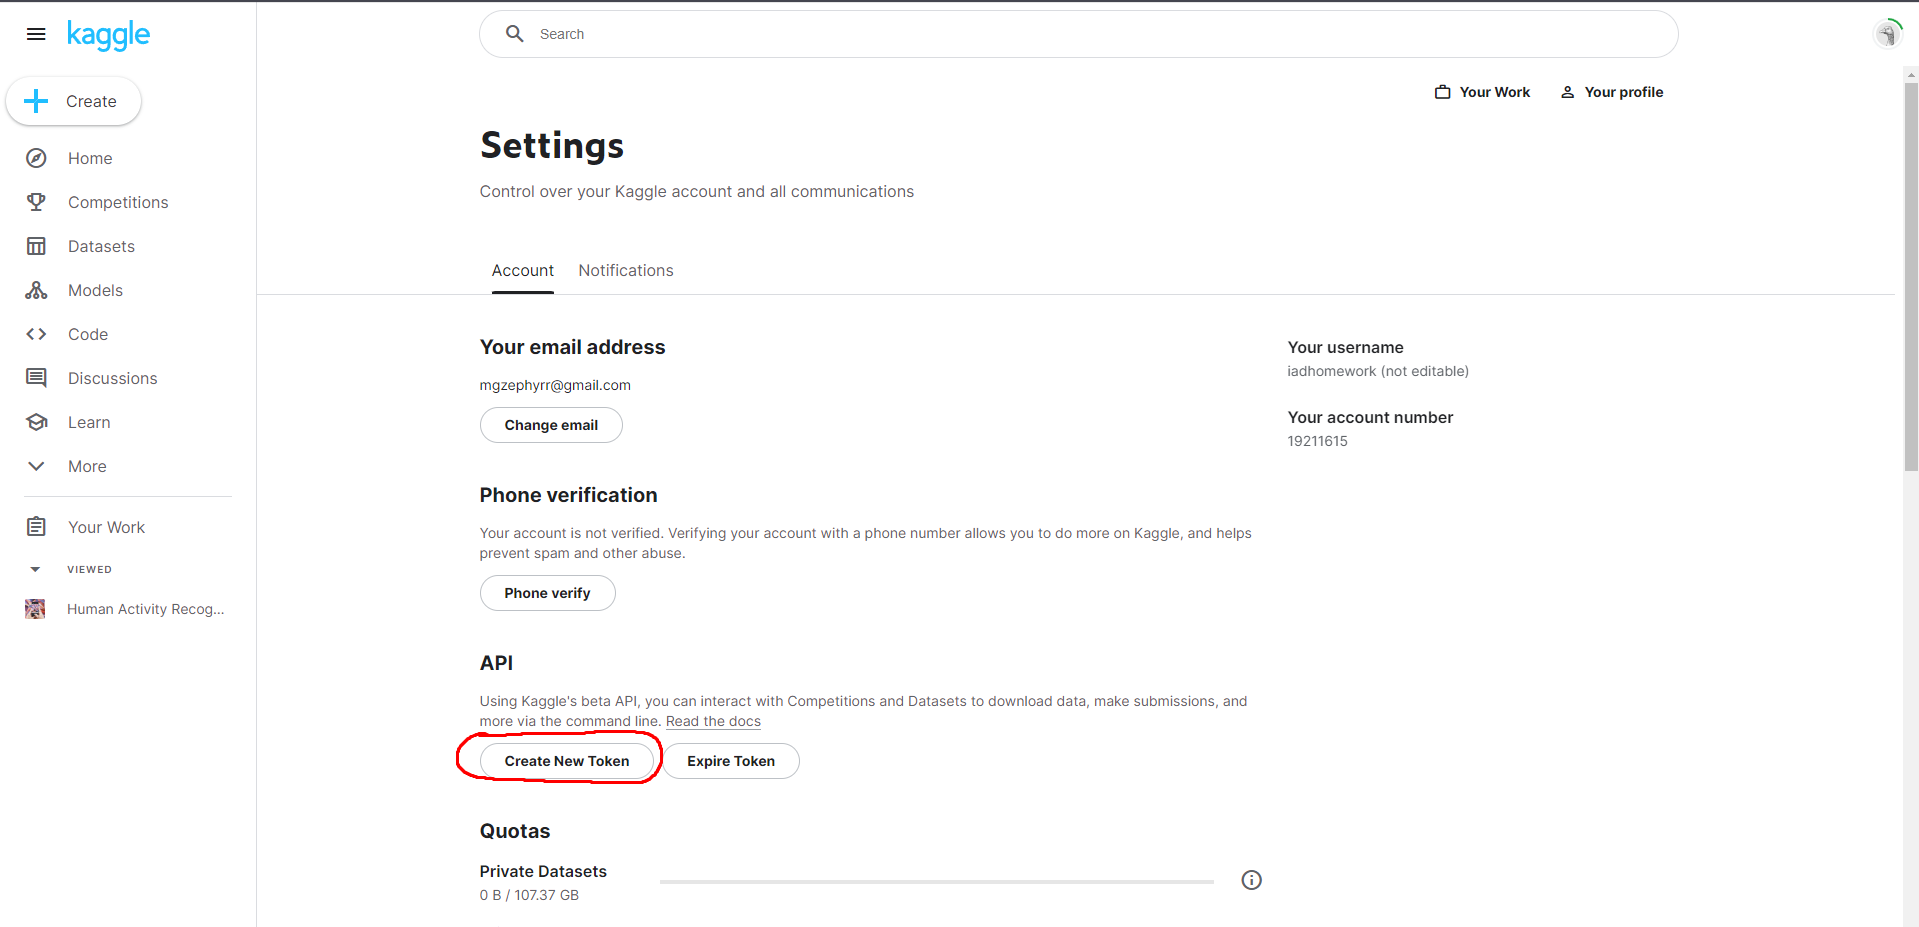

### Импорт датасета

>Ниже нужно нажать кнопку **выбрать файлы**, найти файл `kaggle.json` на своем компьютере и загрузить его.
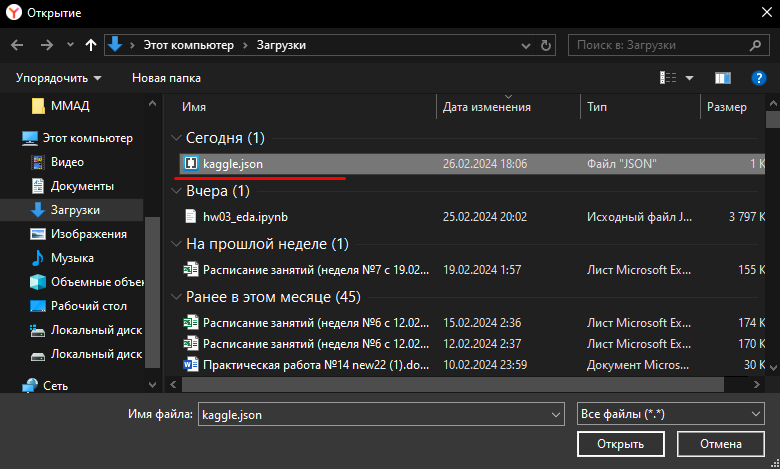

In [2]:
from google.colab import files
import zipfile

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [4]:
! kaggle datasets download shivam2503/diamonds

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 82.3MB/s]


In [5]:
with zipfile.ZipFile('diamonds.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
df = pd.read_csv('diamonds.csv')

In [10]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Задание 3: Линейная регрессия.

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

### Задача 3.1 (0.2 балла)
Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [11]:
df.isna().sum().sum()

0

Пропусков в датасете нет (выражение выше равняется нулю).

In [12]:
df = df.drop('Unnamed: 0', axis = 1)

In [13]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Подозреваю, что столбец `Unnamed: 0` был индексом в изначальном датасете, а read_csv присвоил элементам свои индексы, поэтому, так как полезной информации этот столбец больше не несет и ни за чем не нужен, считаю, что я имею право его "дропнуть".

### Задача 3.2 (0.1 балла)
Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [14]:
num_cols = list(df._get_numeric_data().columns)
cat_cols = list(set(df.columns) - set(num_cols))

In [15]:
df[num_cols].corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего с target-переменной коррелируют `carat`, `x`, `y`, `z`. Значение `price` равное единице игнорируем, так как это и есть target.

### Задача 3.3 (0.1 балла)
Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
df = pd.get_dummies(df, columns = cat_cols)
df

,carat,depth,table,price,x,y,z,clarity_I1,clarity_IF,clarity_SI1,...,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,1,0,0,1,0,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,...,0,0,0,1,0,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,...,0,0,1,1,0,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Задача 3.4 (0.2 балла)
Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,carat,depth,table,x,y,z,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,...,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
19497,1.21,61.3,57.0,6.92,6.87,4.23,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
31229,0.31,62.0,56.0,4.38,4.36,2.71,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
22311,1.21,62.4,57.0,6.75,6.83,4.24,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
278,0.81,62.6,55.0,5.92,5.96,3.72,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
6646,0.79,61.7,56.0,5.94,5.95,3.67,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.05,62.4,59.0,6.48,6.51,4.05,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
44732,0.47,61.0,55.0,5.03,5.01,3.06,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
38158,0.33,60.3,58.0,4.49,4.46,2.70,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
860,0.90,62.8,59.0,6.13,6.03,3.82,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


Параметр stratify при разделении выборок на тренировочную и тестовую был опущен намеренно. Причиной этому является то, что в target переменной есть значения, встречающиеся только 1 раз, из-за чего stratify ломается. Да и в целом, не вижу смысла его здесь использовать.

### Задача 3.5 (0.3 балла)
Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

### Задача 3.6 (0.2 балла)
Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
reg = LinearRegression().fit(X_train_transformed, y_train)

In [ ]:
print("MSE on Train:", mean_squared_error(reg.predict(X_train_transformed), y_train))
print("MSE on Test:", mean_squared_error(reg.predict(X_test_transformed), y_test))

MSE on Train: 1290541.9147450614
MSE on Test: 1244765.4357158712


Т.к. в качестве метрики ошибки была выбрана MSE, то показатели ошибки для интерпретации может быть полезно возвести в 0.5 степень (взять корень). Получаем, что ошибка на каждом предикте в среднем составляет чуть больше 1000 (что необязательно является правдой, может быть мы очень сильно промахиваемся на больших значениях/выбросах, а в средние хорошо попадаем).

Также видно, что на "новые" данные модель реагирует так же, как и на обучающую выборку, а значит (показатели ошибок практически равны), а значит, она, скорее всего, не переобучилась.

### Задача 3.7 (0.2 балла)
Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
coefs = pd.DataFrame({
    'column': X_train.columns,
    'coef': reg.coef_
})
coefs

,column,coef
0,carat,5338.615671
1,depth,-90.173817
2,table,-60.332280
3,x,-1100.418850
4,y,-6.458917
5,z,-34.258945
6,clarity_I1,-473.825710
7,clarity_IF,244.223357
8,clarity_SI1,-146.575938
9,clarity_SI2,-491.478784


Наиболее ключевым фактором в определении цены является `carat`, его коэффициент в модели на порядок выше всех остальных.

Следующим по абсолютной величине коэффициентом можно выделить `x`. По какой-то причине модель установила, что чем длиннее алмаз, тем меньше он стоит (возможно, это соотносится с обработкой и отделкой алмаза, чем хуже он обработан, тем больше площади занимает).

Далее можно выделить `clarity` и `color`, "чистота" алмаза и его цвет соответственно:
* Что касается цвета, согласно описанию датасета, букве J соответствует **худший** цвет (как они его определили - без понятия), а букве D - **лучший**. Т.е. ранжирование "хорошести" цвета происходит в порядке, обратном алфавитному: чем ближе к началу алфавита, тем лучше. В коэффициентах прослеживается та же тенденция. Они расположены практически линейно, в соответствии с описанием (чем дальше буква от начала алфавита, тем хуже). Выглядит очевидным то, что чем красивее цвет алмаза, тем дороже он должен стоить.
* "Чистоте" алмаза не свойственна такая прямолинейность, как с цветом. Опять же, согласно описанию датасета, распределение чистоты алмаза следующее: **I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)**. Исходя из величин коэффициентов, IF не является лучшей чистотой алмаза, если мы говорим о его цене: VVS2 и VVS1 имеют б**о**льшие коэффициенты, а значит, сильнее влияют на цену (в более дорогую сторону). Возможно, IF, VVS2 и VVS1 сильно друг от друга не отличаются, но, например, VVS алмазы более популярны и на слуху, поэтому и стоят дороже (как брендовые вещи, например).

### Задача 3.8 (0.4 балла)
Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
a = 10 # гиперпараметр регуляризации
reg_lasso = Lasso(alpha=a).fit(X_train_transformed, y_train)
reg_ridge = Ridge(alpha=a).fit(X_train_transformed, y_train)
coefs['coef_lasso'] = reg_lasso.coef_
coefs['coef_ridge'] = reg_ridge.coef_

In [ ]:
coefs

,column,coef,coef_lasso,coef_ridge
0,carat,5338.615671,4872.162306,5301.289062
1,depth,-90.173817,-57.093885,-87.639805
2,table,-60.332280,-47.684100,-60.123686
3,x,-1100.418850,-652.164146,-1057.228888
4,y,-6.458917,-0.000000,-9.605149
5,z,-34.258945,-43.263975,-38.071544
6,clarity_I1,-473.825710,-488.727727,-473.321397
7,clarity_IF,244.223357,194.053672,244.575156
8,clarity_SI1,-146.575938,-252.336048,-147.096586
9,clarity_SI2,-491.478784,-573.636090,-491.313752


Веса, что в **Lasso**, что в **Ridge** уменьшились несильно (в случае Ridge вообще почти не поменялись), однако, Lasso занулила некоторые веса, намекая на то, что они не нужны.

### Задача 3.9 (0.4 балла)
Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
df_regressions = pd.DataFrame({
    'alpha': [0.1, 1, 10, 100, 200]
})

df_regressions['lasso_norm'] = df_regressions.apply(lambda row: np.linalg.norm(Lasso(alpha=row['alpha']).fit(X_train_transformed, y_train).coef_), axis = 1)
df_regressions['ridge_norm'] = df_regressions.apply(lambda row: np.linalg.norm(Ridge(alpha=row['alpha']).fit(X_train_transformed, y_train).coef_), axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+08, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


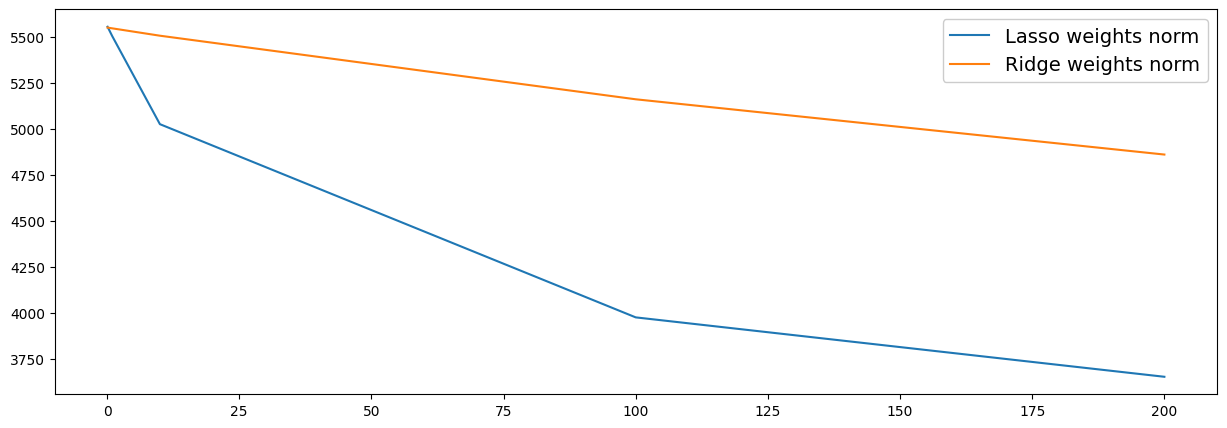

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df_regressions['alpha'], df_regressions['lasso_norm'], label='Lasso weights norm')
plt.plot(df_regressions['alpha'], df_regressions['ridge_norm'], label='Ridge weights norm')
plt.legend(fontsize=14, framealpha=1, facecolor='w')
plt.show()

Из графика можно увидеть, что Lasso-регрессия агрессивнее уменьшает веса. Происходит это из-за природы этих двух методов регуляризации.
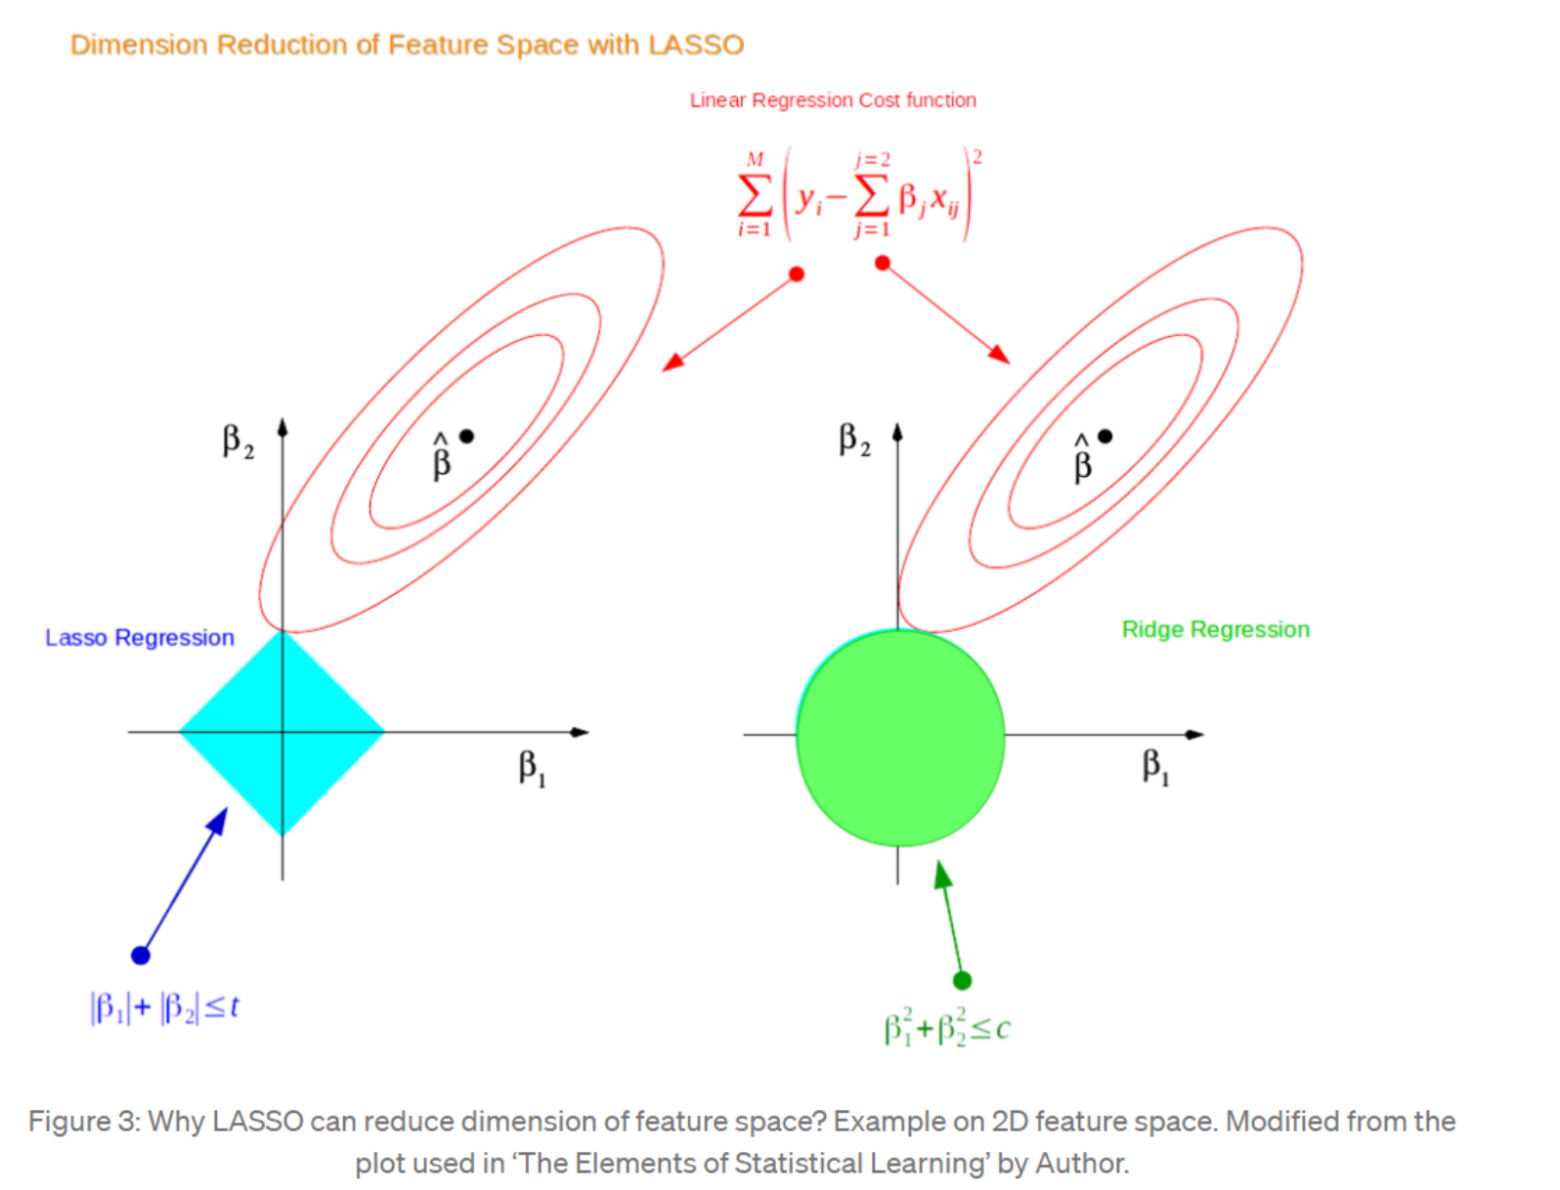

Допустим, наша модель имеет вид **y = β2 * x + β1** их величины располагаются на осях y и x соответственно. В виде красных овалов представлена квадратичная функция потерь, а точнее её вид "сверху" (сама функция - параболоида в 3-х мерном пространстве). Точка β с крышечкой это точка, где ошибка - минимальна. Если бы мы не использовали никаких регуляризаторов, то просто взяли бы эти веса и не парились. Однако, регуляризаторы, можно сказать накладывают ограничения на то, какими большими веса у модели в принципе могут быть. Это ограничение обязывает нас идти в сторону центра координат до того момента, пока мы не достигнем данной области.

На графиках видно, даже при двух фичах, область фигуры Lasso намного меньше, чем у Ridge (ее "стенки" - прямые, тогда как у Ridge - круглые). Естественно, приведенный случай является одним из самых простых, если мы говорим о реальных моделях, кол-во фичей в которых сильно-сильно больше двух (а следовательно и график располагается не в 2-мерном пространстве, а в n-мерном, где n - количество фичей), то там это различие в площадях областей, ограничивающих веса, еще больше.

Также из приведенной картинки видно почему Lasso используют для отбора признаков. Часто, после отбора оптимальных весов и "спуска" к нужной нам области получается так, что мы оказываемся в точке, пересекающей оси координат просто по причине того, что это самый короткий маршрут из какой-либо точки гиперплоскости до нашего ограничения. Пересечение с осью координат говорит, что для какого-то признака в качестве веса мы выбрали 0, а значит, его можно попросту исключить из рассмотрения (т.к. он все равно ни на что не влияет).

P.S. вдохновился [данной статьёй](https://habr.com/ru/articles/679232/) на Хабре.

### Задача 3.10 (0.5 балла)
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
reg = LassoCV(alphas=df_regressions['alpha'], cv=5, random_state=42).fit(X_train_transformed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498981464.32806015, tolerance: 48476565.465277866
  model = cd_fast.enet_coordinate_descent_gram(


In [ ]:
pd.DataFrame({
    'alpha': reg.alphas_,
    'CV_MSE': np.mean(reg.mse_path_, axis=1)
})

,alpha,CV_MSE
0,200.0,1.969031e+06
1,100.0,1.546274e+06
2,10.0,1.304386e+06
3,1.0,1.293680e+06
4,0.1,1.295600e+06


Исходя из усредненной среднеквадратичной ошибки на кросс-валидации модели по 5 участкам заметно, что лучшим значением параметра $\alpha$ является 1.

### Задача 3.11 (0.5 балла)
Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
coefs = coefs.drop(['coef_lasso', 'coef_ridge'], axis=1)
coefs['lasso_coef'] = Lasso(alpha=1).fit(X_train_transformed, y_train).coef_

In [ ]:
coefs

,column,coef,lasso_coef
0,carat,5338.615671,5292.390450
1,depth,-90.173817,-86.829423
2,table,-60.332280,-59.023997
3,x,-1100.418850,-1057.142870
4,y,-6.458917,-4.230483
5,z,-34.258945,-35.457194
6,clarity_I1,-473.825710,-500.713087
7,clarity_IF,244.223357,200.041171
8,clarity_SI1,-146.575938,-251.407519
9,clarity_SI2,-491.478784,-581.962240


В целом, веса остались практически такими же. Про "информативные" веса и их возможную интерпретацию (смысловое объяснение) я уже написал в задании 3.7.

Заметим, что Lasso модель "в своем стиле" занулила некоторые веса (а именно, веса некоторых столбцов, которые были закодированы с помощью OneHot), действительно, из модели мы бы их могли удалить и при этом информацию бы мы не потеряли (т. к. отрицание всех имеющихся вариантов это еще один вариант, который как раз и можно отнести к тому, что мы удалим).

Ширина (`y`) является самым незначительным признаком, честно, не имею представления, почему так, но это видно из весов. Также `z` является достаточно незначительным и особо не сказывается на цене алмаза. Почему-то алмазам стоимость "сбивает" именно длина...

`depth` и `table` тоже является показателями размера алмаза и тоже очень несильно влияют на цену, однако, сильнее, чем стандартные характеристики размеров (кроме х). Возможно эти показатели как-то влияют на "красоту" алмазов и их симметричность и эстетичность.

### Задача 3.12 (0.4 балла)
Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
usual_reg = LinearRegression().fit(X_train_transformed, y_train)
lasso_reg = Lasso(alpha=1).fit(X_train_transformed, y_train)

print("MSE on Usual Regression:", mean_squared_error(usual_reg.predict(X_test_transformed), y_test))
print("MSE on Lasso Regression:", mean_squared_error(lasso_reg.predict(X_test_transformed), y_test))

MSE on Usual Regression: 1244765.4357158712
MSE on Lasso Regression: 1244867.1317911262


В моем случае получилось так, что MSE почти не изменилась (с использованием Lasso она даже увеличилась), поэтому не могу оценить какую модель использовать лучше и объяснить это... Вместо этого могу объяснить почему, как я считаю, это получилось. По моему мнению в изначальной модели не было замечено ни переобучения, ни сильно "раздувшихся", огромных весов, ни ранее упомянутой "проблемы мультиколлинеарности", а поэтому в регуляризации нет особого смысла и она особо ничего и не делает.